# 蒙特卡洛方法实践练习
# Monte Carlo Method Practice Exercises

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import integrate
import time

# 设置中文字体和随机种子
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
np.random.seed(42)

# ============================================================================
# 练习一：估算圆周率π
# Exercise 1: Estimating π using Monte Carlo Method
# ============================================================================

In [2]:
print("="*60)
print("练习一：用蒙特卡洛方法估算圆周率π")
print("Exercise 1: Estimating π using Monte Carlo Method")
print("="*60)

练习一：用蒙特卡洛方法估算圆周率π
Exercise 1: Estimating π using Monte Carlo Method


In [3]:
def estimate_pi_single(n):
    """
    使用蒙特卡洛方法估算π值
    
    参数:
        n: 随机点的数量
    
    返回:
        pi_estimate: π的估计值
        x, y: 随机点坐标
        inside_circle: 布尔数组，标记点是否在圆内
    """
    # 生成随机点坐标
    x = np.random.uniform(-1, 1, n)
    y = np.random.uniform(-1, 1, n)
    
    # 判断点是否在单位圆内
    inside_circle = (x**2 + y**2) <= 1
    
    # 计算π的估计值
    pi_estimate = 4 * np.sum(inside_circle) / n
    
    return pi_estimate, x, y, inside_circle

# 1.1 单次估算π值

In [4]:

print("\n1.1 单次估算π值")
n_points = 10000
pi_est, x_coords, y_coords, is_inside = estimate_pi_single(n_points)

print(f"使用 {n_points} 个随机点")
print(f"π的估计值: {pi_est:.6f}")
print(f"真实π值: {np.pi:.6f}")
print(f"绝对误差: {abs(pi_est - np.pi):.6f}")
print(f"相对误差: {abs(pi_est - np.pi)/np.pi*100:.3f}%")


1.1 单次估算π值
使用 10000 个随机点
π的估计值: 3.134800
真实π值: 3.141593
绝对误差: 0.006793
相对误差: 0.216%


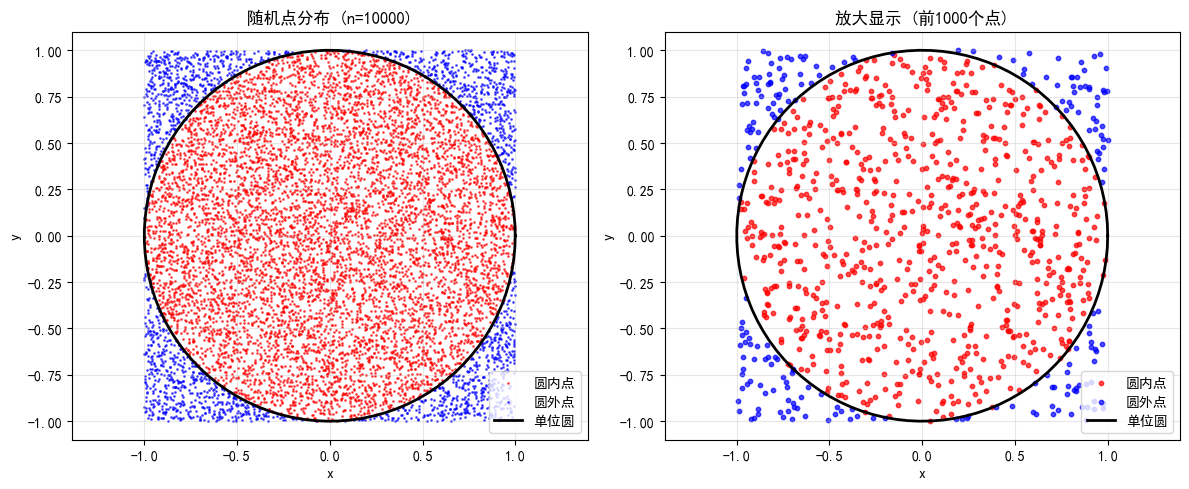

In [5]:
# 1.2 可视化随机点分布
plt.figure(figsize=(12, 5))
# 子图1：显示所有点
plt.subplot(1, 2, 1)
plt.scatter(x_coords[is_inside], y_coords[is_inside], c='red', s=1, alpha=0.6, label='圆内点')
plt.scatter(x_coords[~is_inside], y_coords[~is_inside], c='blue', s=1, alpha=0.6, label='圆外点')

# 绘制单位圆
theta = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(theta), np.sin(theta), 'k-', linewidth=2, label='单位圆')

plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.axis('equal')
plt.grid(True, alpha=0.3)
plt.legend()
plt.title(f'随机点分布 (n={n_points})')
plt.xlabel('x')
plt.ylabel('y')

# 子图2：部分放大显示
plt.subplot(1, 2, 2)
n_show = 1000  # 只显示前1000个点，避免图像过于密集
plt.scatter(x_coords[:n_show][is_inside[:n_show]], y_coords[:n_show][is_inside[:n_show]], 
           c='red', s=10, alpha=0.7, label='圆内点')
plt.scatter(x_coords[:n_show][~is_inside[:n_show]], y_coords[:n_show][~is_inside[:n_show]], 
           c='blue', s=10, alpha=0.7, label='圆外点')
plt.plot(np.cos(theta), np.sin(theta), 'k-', linewidth=2, label='单位圆')

plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.axis('equal')
plt.grid(True, alpha=0.3)
plt.legend()
plt.title(f'放大显示 (前{n_show}个点)')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()

# 1.3 收敛性分析

In [6]:
print("\n1.3 收敛性分析")

def analyze_convergence(max_n=50000, step=1000):
    """分析π估计的收敛过程"""
    n_values = range(step, max_n+1, step)
    pi_estimates = []
    errors = []
    
    # 生成一次性的大量随机点
    x_all = np.random.uniform(-1, 1, max_n)
    y_all = np.random.uniform(-1, 1, max_n)
    inside_all = (x_all**2 + y_all**2) <= 1
    
    for n in n_values:
        # 使用前n个点计算π
        pi_est = 4 * np.sum(inside_all[:n]) / n
        pi_estimates.append(pi_est)
        errors.append(abs(pi_est - np.pi))
    
    return n_values, pi_estimates, errors

n_vals, pi_ests, errs = analyze_convergence()


1.3 收敛性分析


# 绘制收敛曲线

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


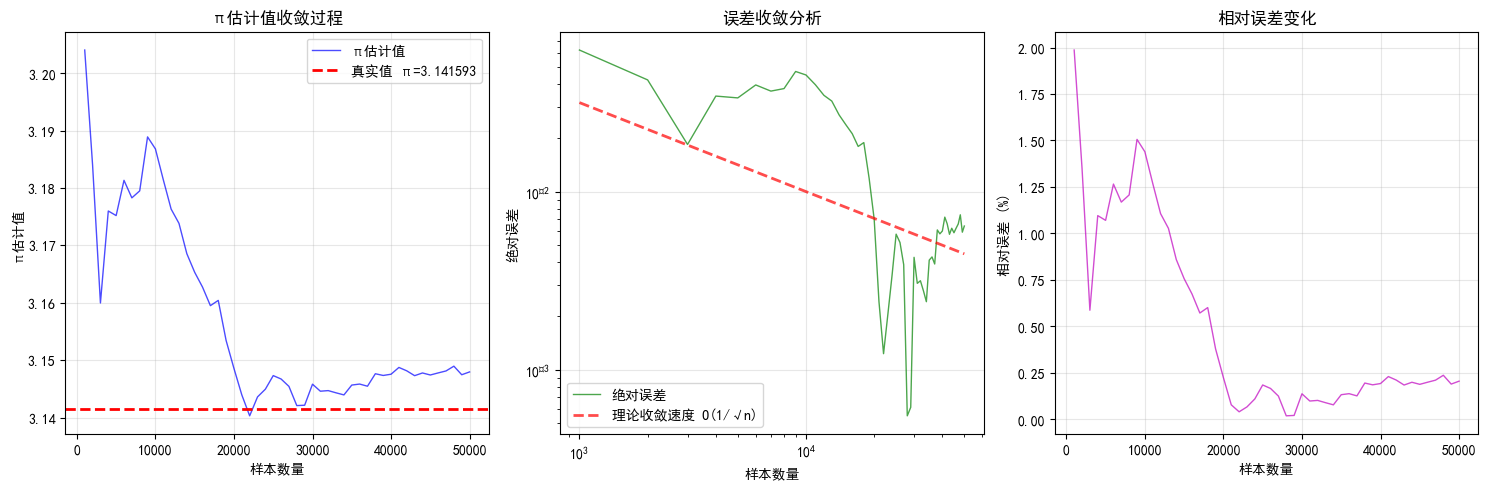

In [7]:

plt.figure(figsize=(15, 5))

# 子图1：π估计值随样本数变化
plt.subplot(1, 3, 1)
plt.plot(n_vals, pi_ests, 'b-', linewidth=1, alpha=0.7, label='π估计值')
plt.axhline(y=np.pi, color='r', linestyle='--', linewidth=2, label=f'真实值 π={np.pi:.6f}')
plt.xlabel('样本数量')
plt.ylabel('π估计值')
plt.title('π估计值收敛过程')
plt.legend()
plt.grid(True, alpha=0.3)

# 子图2：绝对误差随样本数变化
plt.subplot(1, 3, 2)
plt.plot(n_vals, errs, 'g-', linewidth=1, alpha=0.7, label='绝对误差')
plt.plot(n_vals, 1/np.sqrt(n_vals), 'r--', linewidth=2, alpha=0.7, label='理论收敛速度 O(1/√n)')
plt.xlabel('样本数量')
plt.ylabel('绝对误差')
plt.title('误差收敛分析')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.xscale('log')

# 子图3：相对误差百分比
plt.subplot(1, 3, 3)
relative_errors = [err/np.pi*100 for err in errs]
plt.plot(n_vals, relative_errors, 'm-', linewidth=1, alpha=0.7)
plt.xlabel('样本数量')
plt.ylabel('相对误差 (%)')
plt.title('相对误差变化')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [8]:
# 输出统计信息
print(f"最终估计值 (n={n_vals[-1]}): {pi_ests[-1]:.6f}")
print(f"最终相对误差: {relative_errors[-1]:.3f}%")

# 1.4 多次独立试验的统计分析
print("\n1.4 多次独立试验的统计分析")

def multiple_trials(n_points, n_trials=100):
    """进行多次独立的π估计试验"""
    estimates = []
    for _ in range(n_trials):
        pi_est, _, _, _ = estimate_pi_single(n_points)
        estimates.append(pi_est)
    return np.array(estimates)

n_test = 10000
n_trials = 100
trial_results = multiple_trials(n_test, n_trials)

最终估计值 (n=50000): 3.148000
最终相对误差: 0.204%

1.4 多次独立试验的统计分析


进行 100 次独立试验，每次使用 10000 个点
π估计值的均值: 3.143180
π估计值的标准差: 0.017800
理论标准误差: 0.016422


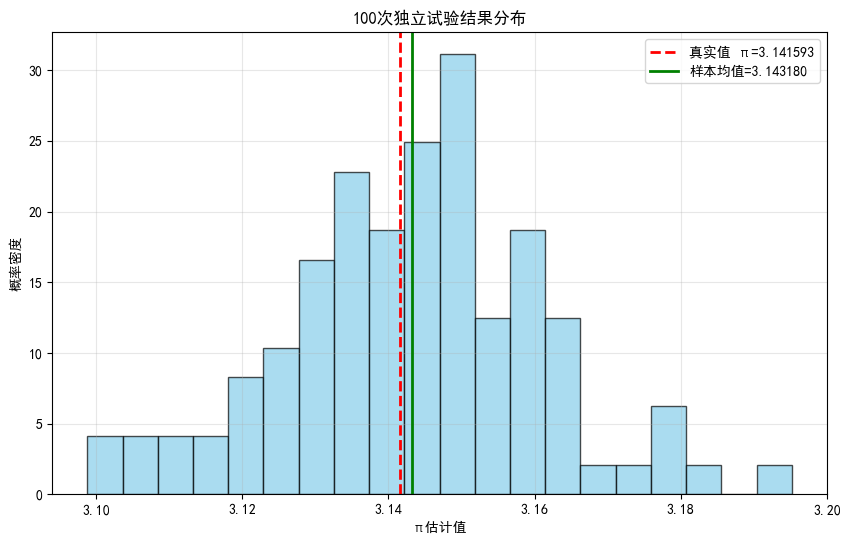

In [9]:
print(f"进行 {n_trials} 次独立试验，每次使用 {n_test} 个点")
print(f"π估计值的均值: {np.mean(trial_results):.6f}")
print(f"π估计值的标准差: {np.std(trial_results):.6f}")
print(f"理论标准误差: {np.sqrt(np.pi*(4-np.pi)/n_test):.6f}")

# 绘制直方图
plt.figure(figsize=(10, 6))
plt.hist(trial_results, bins=20, density=True, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(np.pi, color='red', linestyle='--', linewidth=2, label=f'真实值 π={np.pi:.6f}')
plt.axvline(np.mean(trial_results), color='green', linestyle='-', linewidth=2, 
           label=f'样本均值={np.mean(trial_results):.6f}')
plt.xlabel('π估计值')
plt.ylabel('概率密度')
plt.title(f'{n_trials}次独立试验结果分布')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# ============================================================================
# 练习二：复杂函数的定积分计算
# Exercise 2: Complex Function Integration
# ============================================================================

In [10]:
print("\n" + "="*60)
print("练习二：复杂函数的蒙特卡洛积分")
print("Exercise 2: Monte Carlo Integration of Complex Functions")
print("="*60)



练习二：复杂函数的蒙特卡洛积分
Exercise 2: Monte Carlo Integration of Complex Functions


In [11]:
def target_function(x):
    """
    目标函数: f(x) = e^(-x²) * sin(x)
    这是一个没有简单解析解的函数
    """
    return np.exp(-x**2) * np.sin(x)

def monte_carlo_integral(func, a, b, n):
    """
    蒙特卡洛积分计算
    
    参数:
        func: 被积函数
        a, b: 积分下限和上限
        n: 随机样本数量
    
    返回:
        integral: 积分估计值
        std_error: 标准误差
        samples: 样本点
        func_values: 函数值
    """
    # 生成随机样本
    samples = np.random.uniform(a, b, n)
    
    # 计算函数值
    func_values = func(samples)
    
    # 蒙特卡洛积分估计
    integral = (b - a) * np.mean(func_values)
    
    # 标准误差估计
    std_error = (b - a) * np.std(func_values) / np.sqrt(n)
    
    return integral, std_error, samples, func_values


2.1 目标函数可视化


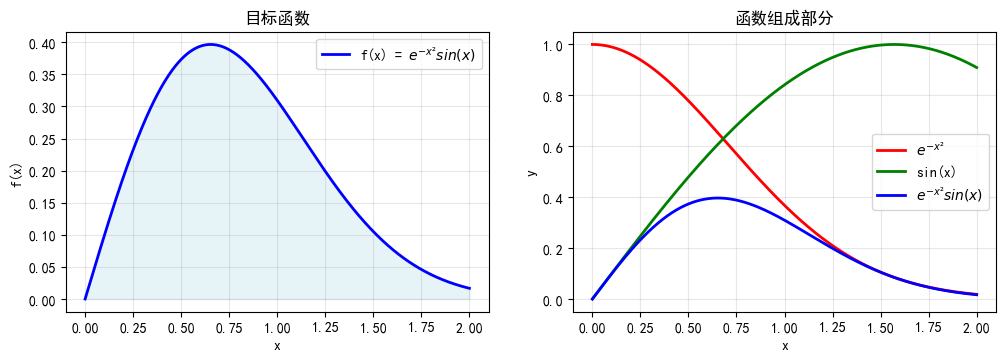

In [12]:
# 2.1 函数可视化
print("\n2.1 目标函数可视化")
x_plot = np.linspace(0, 2, 1000)
y_plot = target_function(x_plot)

plt.figure(figsize=(12, 8))

# 子图1：函数图像
plt.subplot(2, 2, 1)
plt.plot(x_plot, y_plot, 'b-', linewidth=2, label='f(x) = $e^{-x²}sin(x)$')
plt.fill_between(x_plot, 0, y_plot, alpha=0.3, color='lightblue')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('目标函数')
plt.legend()
plt.grid(True, alpha=0.3)

# 子图2：函数组成部分
plt.subplot(2, 2, 2)
plt.plot(x_plot, np.exp(-x_plot**2), 'r-', linewidth=2, label='$e^{-x²}$')
plt.plot(x_plot, np.sin(x_plot), 'g-', linewidth=2, label='sin(x)')
plt.plot(x_plot, y_plot, 'b-', linewidth=2, label='$e^{-x²}sin(x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('函数组成部分')
plt.legend()
plt.grid(True, alpha=0.3)

# 2.2 单次积分计算

In [13]:

print("\n2.2 单次蒙特卡洛积分计算")
a, b = 0, 2  # 积分区间
n_samples = 100000

integral_mc, error_mc, samples, func_vals = monte_carlo_integral(target_function, a, b, n_samples)

# 使用scipy进行数值积分作为参考
integral_scipy, _ = integrate.quad(target_function, a, b)
print(f"积分区间: [{a}, {b}]")
print(f"样本数量: {n_samples}")
print(f"蒙特卡洛估计: {integral_mc:.6f} ± {error_mc:.6f}")
print(f"Scipy数值积分: {integral_scipy:.6f}")
print(f"绝对误差: {abs(integral_mc - integral_scipy):.6f}")
print(f"相对误差: {abs(integral_mc - integral_scipy)/abs(integral_scipy)*100:.3f}%")


2.2 单次蒙特卡洛积分计算
积分区间: [0, 2]
样本数量: 100000
蒙特卡洛估计: 0.421850 ± 0.000832
Scipy数值积分: 0.421164
绝对误差: 0.000685
相对误差: 0.163%


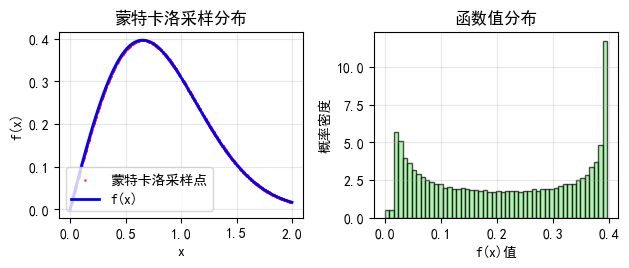

In [14]:
# 子图3：蒙特卡洛采样点
plt.subplot(2, 2, 3)
sample_subset = samples[:1000]  # 只显示部分采样点
func_subset = func_vals[:1000]
plt.scatter(sample_subset, func_subset, c='red', s=1, alpha=0.6, label='蒙特卡洛采样点')
plt.plot(x_plot, y_plot, 'b-', linewidth=2, label='f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('蒙特卡洛采样分布')
plt.legend()
plt.grid(True, alpha=0.3)

# 子图4：函数值分布
plt.subplot(2, 2, 4)
plt.hist(func_vals, bins=50, density=True, alpha=0.7, color='lightgreen', edgecolor='black')
plt.xlabel('f(x)值')
plt.ylabel('概率密度')
plt.title('函数值分布')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2.3 收敛性分析

In [15]:

print("\n2.3 积分收敛性分析")

def integral_convergence_analysis(func, a, b, max_n=100000, step=5000):
    """分析积分估计的收敛过程"""
    n_values = range(step, max_n+1, step)
    integrals = []
    errors = []
    
    # 一次性生成所有随机数
    all_samples = np.random.uniform(a, b, max_n)
    all_func_values = func(all_samples)
    
    for n in n_values:
        # 使用前n个样本
        current_samples = all_func_values[:n]
        integral_est = (b - a) * np.mean(current_samples)
        std_err = (b - a) * np.std(current_samples) / np.sqrt(n)
        
        integrals.append(integral_est)
        errors.append(std_err)
    
    return n_values, integrals, errors

n_vals_int, integrals_int, errors_int = integral_convergence_analysis(target_function, a, b)


2.3 积分收敛性分析


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

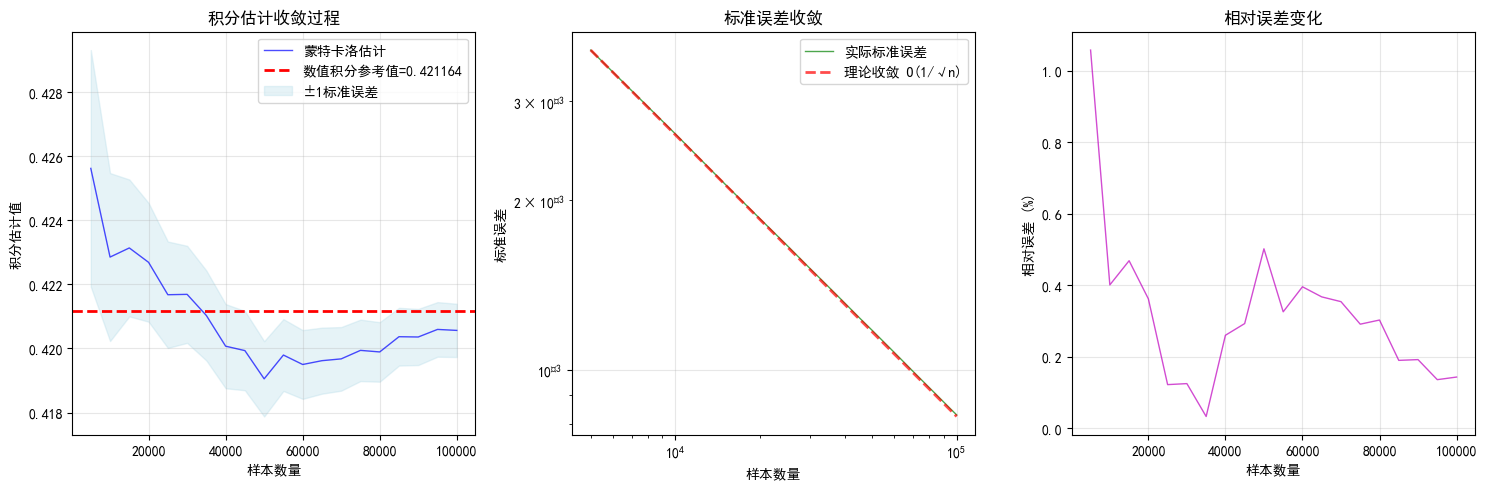

In [16]:
# 绘制收敛过程
plt.figure(figsize=(15, 5))

# 积分值收敛
plt.subplot(1, 3, 1)
plt.plot(n_vals_int, integrals_int, 'b-', linewidth=1, alpha=0.7, label='蒙特卡洛估计')
plt.axhline(y=integral_scipy, color='r', linestyle='--', linewidth=2, 
           label=f'数值积分参考值={integral_scipy:.6f}')
plt.fill_between(n_vals_int, 
                np.array(integrals_int) - np.array(errors_int),
                np.array(integrals_int) + np.array(errors_int),
                alpha=0.3, color='lightblue', label='±1标准误差')
plt.xlabel('样本数量')
plt.ylabel('积分估计值')
plt.title('积分估计收敛过程')
plt.legend()
plt.grid(True, alpha=0.3)

# 标准误差变化
plt.subplot(1, 3, 2)
plt.plot(n_vals_int, errors_int, 'g-', linewidth=1, alpha=0.7, label='实际标准误差')
plt.plot(n_vals_int, errors_int[0]*np.sqrt(n_vals_int[0])/np.sqrt(n_vals_int), 
         'r--', linewidth=2, alpha=0.7, label='理论收敛 O(1/√n)')
plt.xlabel('样本数量')
plt.ylabel('标准误差')
plt.title('标准误差收敛')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.xscale('log')

# 相对误差
plt.subplot(1, 3, 3)
rel_errors = [abs(est - integral_scipy)/abs(integral_scipy)*100 for est in integrals_int]
plt.plot(n_vals_int, rel_errors, 'm-', linewidth=1, alpha=0.7)
plt.xlabel('样本数量')
plt.ylabel('相对误差 (%)')
plt.title('相对误差变化')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


2.4 不同数值积分方法比较
不同样本量的计算结果比较:
      样本数    蒙特卡洛估计      标准误差      绝对误差   相对误差(%)   计算时间(秒)
0    1000  0.417811  0.008416  0.003353  0.796083  0.001170
1    5000  0.426110  0.003690  0.004946  1.174362  0.000000
2   10000  0.421945  0.002628  0.000781  0.185376  0.001091
3   50000  0.419163  0.001177  0.002001  0.475220  0.003069
4  100000  0.421008  0.000832  0.000156  0.037111  0.006202


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


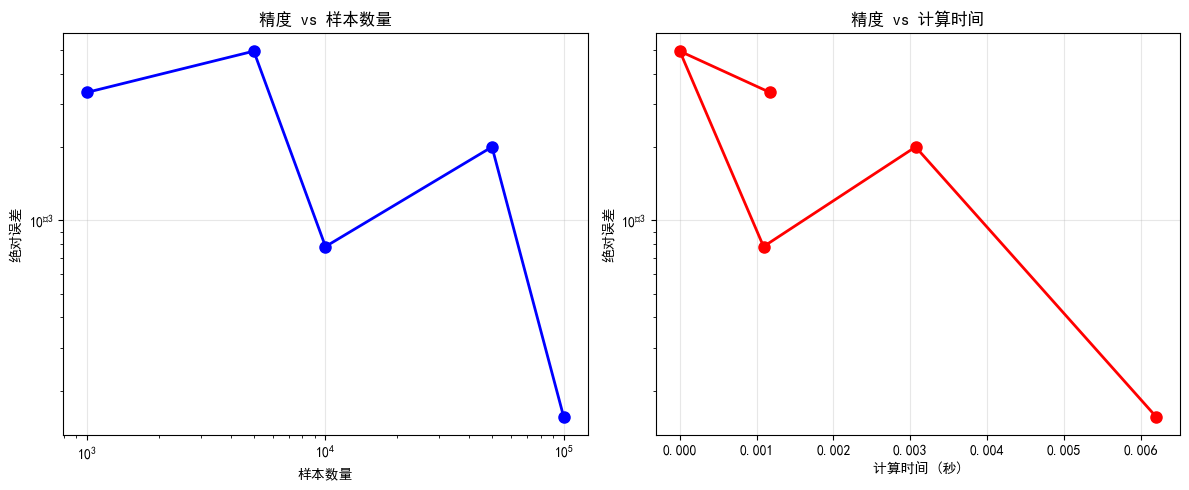

In [17]:
# 2.4 不同积分方法比较
print("\n2.4 不同数值积分方法比较")

# 比较不同样本量下的计算时间和精度
sample_sizes = [1000, 5000, 10000, 50000, 100000]
results_comparison = []

for n in sample_sizes:
    # 蒙特卡洛方法
    start_time = time.time()
    mc_result, mc_error, _, _ = monte_carlo_integral(target_function, a, b, n)
    mc_time = time.time() - start_time
    
    # 计算与参考值的误差
    mc_abs_error = abs(mc_result - integral_scipy)
    
    results_comparison.append({
        '样本数': n,
        '蒙特卡洛估计': mc_result,
        '标准误差': mc_error,
        '绝对误差': mc_abs_error,
        '相对误差(%)': mc_abs_error/abs(integral_scipy)*100,
        '计算时间(秒)': mc_time
    })

# 创建DataFrame显示结果
df_comparison = pd.DataFrame(results_comparison)
print("不同样本量的计算结果比较:")
print(df_comparison.round(6))

# 绘制精度vs计算时间
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.loglog(df_comparison['样本数'], df_comparison['绝对误差'], 'bo-', linewidth=2, markersize=8)
plt.xlabel('样本数量')
plt.ylabel('绝对误差')
plt.title('精度 vs 样本数量')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(df_comparison['计算时间(秒)'], df_comparison['绝对误差'], 'ro-', linewidth=2, markersize=8)
plt.xlabel('计算时间 (秒)')
plt.ylabel('绝对误差')
plt.title('精度 vs 计算时间')
plt.grid(True, alpha=0.3)
plt.yscale('log')

plt.tight_layout()
plt.show()

In [18]:
# 2.5 置信区间分析
print("\n2.5 置信区间分析")

def confidence_interval_analysis(func, a, b, n, confidence_level=0.95, n_trials=50):
    """
    进行多次独立试验，分析置信区间的覆盖率
    
    参数:
        func: 被积函数
        a, b: 积分区间
        n: 每次试验的样本数
        confidence_level: 置信水平
        n_trials: 试验次数
    """
    from scipy.stats import norm
    
    # 计算置信区间的z值
    alpha = 1 - confidence_level
    z_value = norm.ppf(1 - alpha/2)
    
    results = []
    coverage_count = 0
    
    # 参考值
    reference_value, _ = integrate.quad(func, a, b)
    
    for trial in range(n_trials):
        # 进行蒙特卡洛积分
        integral_est, std_error, _, _ = monte_carlo_integral(func, a, b, n)
        
        # 计算置信区间
        lower_bound = integral_est - z_value * std_error
        upper_bound = integral_est + z_value * std_error
        
        # 检查是否覆盖真值
        covers_true_value = lower_bound <= reference_value <= upper_bound
        if covers_true_value:
            coverage_count += 1
        
        results.append({
            '试验': trial + 1,
            '积分估计': integral_est,
            '下界': lower_bound,
            '上界': upper_bound,
            '区间宽度': upper_bound - lower_bound,
            '覆盖真值': covers_true_value
        })
    
    coverage_rate = coverage_count / n_trials
    
    return results, coverage_rate, reference_value


2.5 置信区间分析


In [19]:
# 进行置信区间分析
ci_results, coverage_rate, ref_val = confidence_interval_analysis(
    target_function, a, b, n=10000, confidence_level=0.95, n_trials=50
)

print(f"95%置信区间分析结果 (基于{len(ci_results)}次独立试验):")
print(f"理论覆盖率: 95%")
print(f"实际覆盖率: {coverage_rate*100:.1f}%")
print(f"参考积分值: {ref_val:.6f}")

95%置信区间分析结果 (基于50次独立试验):
理论覆盖率: 95%
实际覆盖率: 94.0%
参考积分值: 0.421164


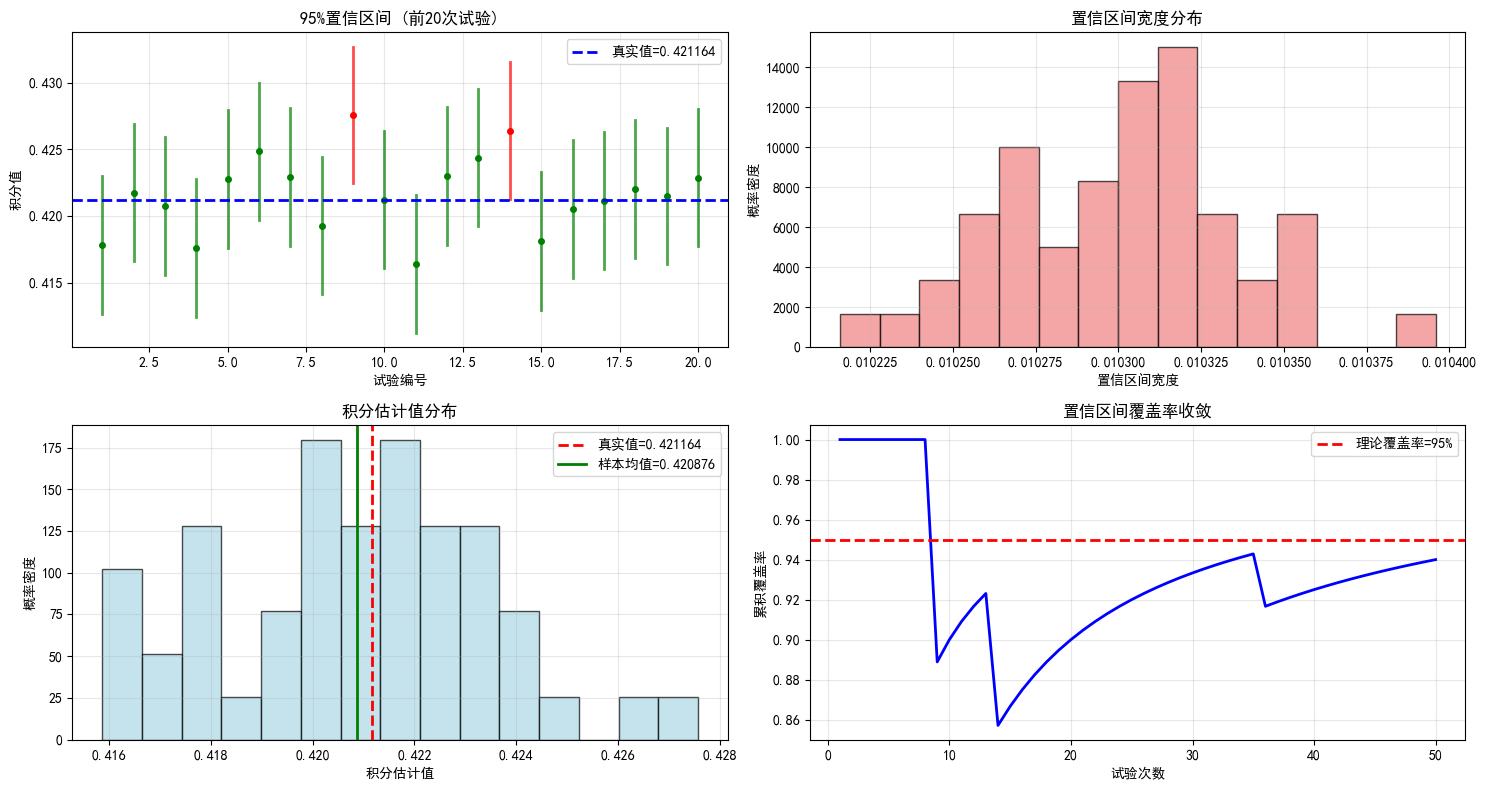

In [20]:


# 可视化置信区间
plt.figure(figsize=(15, 8))

# 子图1：置信区间可视化
plt.subplot(2, 2, 1)
trial_nums = [r['试验'] for r in ci_results[:20]]  # 只显示前20个
estimates = [r['积分估计'] for r in ci_results[:20]]
lower_bounds = [r['下界'] for r in ci_results[:20]]
upper_bounds = [r['上界'] for r in ci_results[:20]]
covers = [r['覆盖真值'] for r in ci_results[:20]]

# 绘制置信区间
for i, (trial, est, lower, upper, cover) in enumerate(zip(trial_nums, estimates, lower_bounds, upper_bounds, covers)):
    color = 'green' if cover else 'red'
    plt.plot([trial, trial], [lower, upper], color=color, linewidth=2, alpha=0.7)
    plt.plot(trial, est, 'o', color=color, markersize=4)

plt.axhline(y=ref_val, color='blue', linestyle='--', linewidth=2, label=f'真实值={ref_val:.6f}')
plt.xlabel('试验编号')
plt.ylabel('积分值')
plt.title('95%置信区间 (前20次试验)')
plt.legend()
plt.grid(True, alpha=0.3)

# 子图2：区间宽度分布
plt.subplot(2, 2, 2)
widths = [r['区间宽度'] for r in ci_results]
plt.hist(widths, bins=15, density=True, alpha=0.7, color='lightcoral', edgecolor='black')
plt.xlabel('置信区间宽度')
plt.ylabel('概率密度')
plt.title('置信区间宽度分布')
plt.grid(True, alpha=0.3)

# 子图3：估计值分布
plt.subplot(2, 2, 3)
all_estimates = [r['积分估计'] for r in ci_results]
plt.hist(all_estimates, bins=15, density=True, alpha=0.7, color='lightblue', edgecolor='black')
plt.axvline(ref_val, color='red', linestyle='--', linewidth=2, label=f'真实值={ref_val:.6f}')
plt.axvline(np.mean(all_estimates), color='green', linestyle='-', linewidth=2, 
           label=f'样本均值={np.mean(all_estimates):.6f}')
plt.xlabel('积分估计值')
plt.ylabel('概率密度')
plt.title('积分估计值分布')
plt.legend()
plt.grid(True, alpha=0.3)

# 子图4：覆盖率随试验次数变化
plt.subplot(2, 2, 4)
cumulative_coverage = []
cumulative_count = 0
for i, result in enumerate(ci_results):
    if result['覆盖真值']:
        cumulative_count += 1
    cumulative_coverage.append(cumulative_count / (i + 1))

plt.plot(range(1, len(ci_results) + 1), cumulative_coverage, 'b-', linewidth=2)
plt.axhline(y=0.95, color='red', linestyle='--', linewidth=2, label='理论覆盖率=95%')
plt.xlabel('试验次数')
plt.ylabel('累积覆盖率')
plt.title('置信区间覆盖率收敛')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



# ============================================================================
# 总结与拓展练习
# Summary and Extended Exercises
# ============================================================================

In [21]:


print("\n" + "="*60)
print("总结与拓展练习")
print("Summary and Extended Exercises")
print("="*60)

# 3.1 方法比较总结
print("\n3.1 蒙特卡洛方法特点总结")

summary_data = {
    '特性': ['收敛速度', '维数依赖性', '实现难度', '计算成本', '精度控制', '并行性'],
    '蒙特卡洛方法': ['O(1/√n)', '无关', '简单', '中等', '通过增加n', '优秀'],
    '传统数值方法': ['O(1/n²)或更快', '指数增长', '复杂', '低维低，高维高', '通过细化网格', '一般']
}

comparison_df = pd.DataFrame(summary_data)
print("\n蒙特卡洛方法 vs 传统数值方法:")
print(comparison_df.to_string(index=False))

# 3.2 误差来源分析
print("\n3.2 蒙特卡洛方法误差来源分析")

error_sources = {
    '误差类型': ['统计误差', '系统误差', '舍入误差'],
    '产生原因': ['随机抽样的有限性', '模型假设偏差', '计算机数值精度'],
    '主要特征': ['随样本数减小', '与样本数无关', '通常很小'],
    '减小方法': ['增加样本数', '改进模型', '使用高精度计算']
}

error_df = pd.DataFrame(error_sources)
print("\n误差来源分析:")
print(error_df.to_string(index=False))




总结与拓展练习
Summary and Extended Exercises

3.1 蒙特卡洛方法特点总结

蒙特卡洛方法 vs 传统数值方法:
   特性  蒙特卡洛方法     传统数值方法
 收敛速度 O(1/√n) O(1/n²)或更快
维数依赖性      无关       指数增长
 实现难度      简单         复杂
 计算成本      中等    低维低，高维高
 精度控制   通过增加n     通过细化网格
  并行性      优秀         一般

3.2 蒙特卡洛方法误差来源分析

误差来源分析:
误差类型     产生原因   主要特征    减小方法
统计误差 随机抽样的有限性 随样本数减小   增加样本数
系统误差   模型假设偏差 与样本数无关    改进模型
舍入误差  计算机数值精度   通常很小 使用高精度计算


In [22]:
# 3.3 实际应用场景
print("\n3.3 蒙特卡洛方法的实际应用场景")

applications = {
    '应用领域': ['金融工程', '物理模拟', '机器学习', '运筹优化', '风险评估'],
    '具体应用': ['期权定价', '粒子输运', 'MCMC采样', '随机优化', '可靠性分析'],
    '优势': ['处理复杂模型', '模拟真实过程', '处理高维问题', '全局搜索', '概率建模']
}

app_df = pd.DataFrame(applications)
print("\n应用场景总结:")
print(app_df.to_string(index=False))




3.3 蒙特卡洛方法的实际应用场景

应用场景总结:
应用领域   具体应用     优势
金融工程   期权定价 处理复杂模型
物理模拟   粒子输运 模拟真实过程
机器学习 MCMC采样 处理高维问题
运筹优化   随机优化   全局搜索
风险评估  可靠性分析   概率建模


In [23]:
# 3.4 拓展练习建议
print("\n3.4 拓展练习建议")

extended_exercises = [
    "1. 几何应用：估算不规则图形面积",
    "   - 设计复杂边界的区域",
    "   - 使用rejection sampling",
    "   - 与解析解对比验证",
    "",
    "2. 概率计算：复杂事件概率估算",
    "   - 多维正态分布尾概率",
    "   - 复合事件概率",
    "   - 条件概率估算",
    "",
    "3. 优化问题：随机优化算法",
    "   - 模拟退火算法",
    "   - 遗传算法",
    "   - 粒子群优化",
    "",
    "4. 方差缩减：提高估计效率",
    "   - 重要性采样实现",
    "   - 分层抽样技术",
    "   - 控制变量方法",
    "",
    "5. 实际问题：建模真实场景",
    "   - 排队论模拟",
    "   - 库存管理优化",
    "   - 项目风险评估"
]

for exercise in extended_exercises:
    print(exercise)




3.4 拓展练习建议
1. 几何应用：估算不规则图形面积
   - 设计复杂边界的区域
   - 使用rejection sampling
   - 与解析解对比验证

2. 概率计算：复杂事件概率估算
   - 多维正态分布尾概率
   - 复合事件概率
   - 条件概率估算

3. 优化问题：随机优化算法
   - 模拟退火算法
   - 遗传算法
   - 粒子群优化

4. 方差缩减：提高估计效率
   - 重要性采样实现
   - 分层抽样技术
   - 控制变量方法

5. 实际问题：建模真实场景
   - 排队论模拟
   - 库存管理优化
   - 项目风险评估


In [24]:
# 3.5 学习建议
print("\n3.5 学习建议与进阶方向")

learning_suggestions = [
    "理论基础:",
    "  - 深入学习概率论与数理统计",
    "  - 理解大数定律和中心极限定理",
    "  - 掌握随机过程基础知识",
    "",
    "编程技能:",
    "  - 熟练掌握NumPy、SciPy、Matplotlib",
    "  - 学习并行计算技术 (multiprocessing, joblib)",
    "  - 了解GPU加速计算 (CuPy, Numba)",
    "",
    "进阶方向:",
    "  - 马尔科夫链蒙特卡洛 (MCMC) 方法",
    "  - 准蒙特卡洛 (Quasi-Monte Carlo) 方法",
    "  - 多层蒙特卡洛 (Multilevel Monte Carlo) 方法",
    "  - 自适应蒙特卡洛方法",
    "",
    "实践项目:",
    "  - 金融衍生品定价模型",
    "  - 物理系统Monte Carlo模拟",
    "  - 贝叶斯统计推断应用",
    "  - 机器学习中的随机算法"
]

for suggestion in learning_suggestions:
    print(suggestion)

print("\n" + "="*60)
print("练习完成！")
print("Complete! 希望通过这些练习，您对蒙特卡洛方法有了深入的理解。")
print("继续探索这个强大工具在各个领域的应用吧！")
print("="*60)

# ============================================================================
# 附加功能：交互式参数调节
# Additional Feature: Interactive Parameter Tuning
# ============================================================================

def interactive_pi_estimation():
    """
    交互式π估计函数，可以调节参数观察效果
    """
    print("\n交互式π估计器")
    print("可以尝试不同的参数设置:")
    
    while True:
        try:
            n = int(input("请输入样本数量 (例如: 10000, 输入0退出): "))
            if n == 0:
                break
            elif n < 100:
                print("样本数太小，建议至少100个")
                continue
                
            print(f"\n正在计算，使用 {n} 个随机点...")
            pi_est, x, y, inside = estimate_pi_single(n)
            
            print(f"π估计值: {pi_est:.6f}")
            print(f"真实π值: {np.pi:.6f}")
            print(f"绝对误差: {abs(pi_est - np.pi):.6f}")
            print(f"相对误差: {abs(pi_est - np.pi)/np.pi*100:.3f}%")
            
            # 询问是否显示图像
            show_plot = input("是否显示可视化结果? (y/n): ").lower()
            if show_plot == 'y':
                plt.figure(figsize=(8, 8))
                # 只显示部分点避免图像过于密集
                n_show = min(2000, n)
                plt.scatter(x[:n_show][inside[:n_show]], y[:n_show][inside[:n_show]], 
                           c='red', s=2, alpha=0.6, label=f'圆内点 ({np.sum(inside)})')
                plt.scatter(x[:n_show][~inside[:n_show]], y[:n_show][~inside[:n_show]], 
                           c='blue', s=2, alpha=0.6, label=f'圆外点 ({n - np.sum(inside)})')
                
                theta = np.linspace(0, 2*np.pi, 100)
                plt.plot(np.cos(theta), np.sin(theta), 'k-', linewidth=2)
                plt.xlim(-1.1, 1.1)
                plt.ylim(-1.1, 1.1)
                plt.axis('equal')
                plt.grid(True, alpha=0.3)
                plt.legend()
                plt.title(f'π估计 = {pi_est:.6f} (n={n})')
                plt.show()
                
        except ValueError:
            print("请输入有效的整数")
        except KeyboardInterrupt:
            print("\n程序中断")
            break
    
    print("感谢使用交互式π估计器！")

# 如果想要运行交互式功能，取消下面一行的注释
# interactive_pi_estimation()

# ============================================================================
# 性能测试与基准比较
# Performance Testing and Benchmarking
# ============================================================================

def performance_benchmark():
    """
    性能基准测试：比较不同实现方式的效率
    """
    print("\n性能基准测试")
    print("比较不同实现方式的计算效率")
    
    import time
    
    def pi_estimation_vectorized(n):
        """向量化实现"""
        x = np.random.uniform(-1, 1, n)
        y = np.random.uniform(-1, 1, n)
        inside = (x**2 + y**2) <= 1
        return 4 * np.sum(inside) / n
    
    def pi_estimation_loop(n):
        """循环实现"""
        count = 0
        for _ in range(n):
            x = np.random.uniform(-1, 1)
            y = np.random.uniform(-1, 1)
            if x**2 + y**2 <= 1:
                count += 1
        return 4 * count / n
    
    sample_sizes = [1000, 10000, 100000]
    
    print(f"{'样本数':<10} {'向量化(秒)':<12} {'循环(秒)':<10} {'加速比':<8}")
    print("-" * 45)
    
    for n in sample_sizes:
        # 向量化实现
        start = time.time()
        pi_vec = pi_estimation_vectorized(n)
        time_vec = time.time() - start
        
        # 循环实现 (只对小样本测试，避免等待太久)
        if n <= 10000:
            start = time.time()
            pi_loop = pi_estimation_loop(n)
            time_loop = time.time() - start
            speedup = time_loop / time_vec
        else:
            time_loop = "N/A"
            speedup = "N/A"
        
        print(f"{n:<10} {time_vec:<12.6f} {time_loop:<10} {speedup}")

# 运行性能测试
print("\n运行性能基准测试...")
performance_benchmark()

print("\n" + "="*60)
print("所有练习和测试完成！")
print("="*60)


3.5 学习建议与进阶方向
理论基础:
  - 深入学习概率论与数理统计
  - 理解大数定律和中心极限定理
  - 掌握随机过程基础知识

编程技能:
  - 熟练掌握NumPy、SciPy、Matplotlib
  - 学习并行计算技术 (multiprocessing, joblib)
  - 了解GPU加速计算 (CuPy, Numba)

进阶方向:
  - 马尔科夫链蒙特卡洛 (MCMC) 方法
  - 准蒙特卡洛 (Quasi-Monte Carlo) 方法
  - 多层蒙特卡洛 (Multilevel Monte Carlo) 方法
  - 自适应蒙特卡洛方法

实践项目:
  - 金融衍生品定价模型
  - 物理系统Monte Carlo模拟
  - 贝叶斯统计推断应用
  - 机器学习中的随机算法

练习完成！
Complete! 希望通过这些练习，您对蒙特卡洛方法有了深入的理解。
继续探索这个强大工具在各个领域的应用吧！

运行性能基准测试...

性能基准测试
比较不同实现方式的计算效率
样本数        向量化(秒)       循环(秒)      加速比     
---------------------------------------------
1000       0.001007     0.013808488845825195 13.714657826189912
10000      0.001003     0.17306280136108398 172.4995247148289
100000     0.005680     N/A        N/A

所有练习和测试完成！
